<a href="https://colab.research.google.com/github/Pavan0604/IOT/blob/main/Greedy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
from numpy.lib.function_base import average
import pandas as pd
import matplotlib.pyplot as plt
import math
import plotly.express as px

In [ ]:
import numpy as np
from numpy.lib.function_base import average
import pandas as pd
import matplotlib.pyplot as plt
import math
import plotly.express as px


Datalist = {}

class Node: ## class for creating node objects
    def __init__(self,battery=100,data=100):
        self.battery=battery
        self.data=data
    def set_values(self,battery=100,data=100):
        self.battery=battery
        self.data=data
    def get_values(self):
        return self.battery, self.data

class Gateway:  ## class for creating gateway objects
    def __init__(self,power=100,storage=100):
        self.power=power
        self.storage = storage
    def set_values(self,power,storage):
        self.storage=storage
        self.power=power
    def get_values(self):
        return self.power,self.storage

class Graph:	## class for creating graph objects
    def __init__(self,num_of_nodes,num_of_gateways):
        self.rows=num_of_nodes
        self.cols=num_of_gateways
        self.adjmatrix=[]
        for i in range(self.rows):
            self.adjmatrix.append([0 for j in range(self.cols)])
    def set_values(self,row,col,value):
        self.adjmatrix[row][col]=value
    def print_graph(self):
        for i in range(self.rows):
            for j in range(self.cols):
                print(self.adjmatrix[i][j],end=" ")
            print('\n')
        print('\n')

def create_nodes(n): ## function to create nodes
    '''while True:
        try:
            n = int(input("Enter number of nodes: "))
        except ValueError:
                print("Invalid input, try again")
                continue
        if n<=0:
            print("Number of nodes cannot be negative & zero ")
            continue
        else:
            break'''
    nodes = [Node() for i in range(n)]
    for i in range(n):
        #battery = int(input("Enter the battery in node{}: ".format(i)))
        ##data = int(input("Enter the data in node{}: ".format(i+1)))
        data  = np.random.randint(0,100)
        nodes[i].set_values(data,data)
    return nodes

def create_gateways(g): ## function to create gateways
    '''while True:
        try:
            #g = int(input("Enter number of gateways: "))
            
        except ValueError:
            print("Invalid input, try again")
            continue
        if(g<=0):
            print("Number of gateways cannot be negative & zero ")
            continue
        else:
            break'''
    gateways = [Gateway() for i in range(g)]
    for i in range(g):
        while True:
            try:
                ##power = int(input("Enter the power in gateway{}: ".format(i+1)))
                power = np.random.randint(0,100)
            except ValueError:
                print("Invalid input, try again")
                continue
            if(power<0):
                print("Power cannot be negative ")
                continue
            else:
                break
        while True:
            try:
                ##storage = int(input("Enter the storage in gateway{}: ".format(i+1)))
                storage = np.random.randint(0,100)
            except ValueError:
                print("Invalid input, try again")
                continue
            if(storage<0):
                print("Storage cannot be negative ")
                continue
            else:
                break
        gateways[i].set_values(power,storage)
    return gateways

def create_graph(num_of_nodes,num_of_gateways):
    graph = Graph(num_of_nodes,num_of_gateways)
    for i in range(num_of_nodes):
        for j in range(num_of_gateways):
            while True:
                try:
                    ##graph.set_values(i,j,int(input("Enter if there is an edge b/w node {} to gateway {}: ".format(i+1,j+1))))
                    graph.set_values(i,j,np.random.randint(0,2))
                except ValueError:
                    print("Invalid input, try again")
                    continue
                if(graph.adjmatrix[i][j]<0):
                    print("Value cannot be negative ")
                    continue
                elif(graph.adjmatrix[i][j]>1):
                    print("Value cannot be greater than 1 ")
                    continue
                else:
                    break
    return graph

def gateways_connected_to_nodes(nodes,gateways,matrix):
    gateways_connected_to_nodes_list={}
    for i in range(len(nodes)):
        for j in range(len(gateways)):
            if(matrix.adjmatrix[i][j]==1):
                if(i in gateways_connected_to_nodes_list):
                    gateways_connected_to_nodes_list[i].append(j)
                else:
                    gateways_connected_to_nodes_list[i]=[j]
    return gateways_connected_to_nodes_list

def calculate_the_cost(each_node,each_gateway,nodes,gateways,matrix): # function to calculate the ratio 
    cost=0
    ratio=float('inf')
    if(each_node.data>0):
        ratio = each_gateway.power/each_node.data
    return ratio

def TotalData(nodes): ## function to calculate the total data in the nodes
    total_data=0
    for i in range(len(nodes)):
        total_data+=nodes[i].data
    return total_data

def TotalStorage(gateways): ## function to calculate the total storage in the gateways
    total_storage=0
    for i in range(len(gateways)):
        total_storage+=gateways[i].storage
    return total_storage



'''def optimization(nodes,gateways,matrix): # Optimization Function
    #print("Optimization started")
    ratio={}
    mini_ratio = float('inf')
    final_gateways=[]
    intial_power = TotalStorage(gateways)
    gateways_connected_to_nodes_list=gateways_connected_to_nodes(nodes,gateways,matrix)
    while TotalData(nodes)>0 and TotalStorage(gateways)>0:
        for i in range(len(nodes)):
            for j in range(len(gateways)):
                if(matrix.adjmatrix[i][j]==1):
                    if(gateways[j].storage>0 and nodes[i].data>0):
                        ratio[(i,j)]=calculate_the_cost(nodes[i],gateways[j],nodes,gateways,matrix)
        for i in range(len(nodes)):
            for j in range(len(gateways)):
                if(matrix.adjmatrix[i][j]==1):
                    if(nodes[i].data>0 and gateways[j].storage>0):
                        if(ratio[(i,j)]<mini_ratio):
                            mini_ratio=ratio[(i,j)]
                            mini_node=i
                            mini_gateway=j
        if(mini_ratio==float('inf')):
            #print("Optimization complete")
            return
        else:
            ##print("Optimization in progress")
            final_gateways.append(mini_gateway)
            #print("Node {} is connected to gateway {} with ratio {}".format(mini_node,mini_gateway,mini_ratio))
            data_to_be_sent=min(nodes[mini_node].data, gateways[mini_gateway].storage)
            nodes[mini_node].data-=data_to_be_sent
            gateways[mini_gateway].storage-=data_to_be_sent
            if(nodes[mini_node].data==0):
                for j in range(len(gateways)):
                    matrix.adjmatrix[mini_node][j]=0
            if(gateways[mini_gateway].storage==0):
                for i in range(len(nodes)):
                    matrix.adjmatrix[i][mini_gateway]=0
            matrix.adjmatrix[mini_node][mini_gateway]=0
            mini_ratio=float('inf')
            ratio={}
    ## print("Optimization complete")

    final_power = TotalStorage(gateways)
    power_consumed = intial_power - final_power
    return power_consumed'''

def optimization(nodes,gateways,matrix):
    #print("Optimization started")
    ratio={}
    mini_ratio = float('inf')
    final_gateways=[]
    #gateways_connected_to_nodes_list=gateways_connected_to_nodes(nodes,gateways,matrix)
    Total_data = TotalData(nodes)
    intial_power = TotalStorage(gateways)
    Total_storage = TotalStorage(gateways)
    while Total_data and Total_storage>0:
        for i in range(len(nodes)):
            for j in range(len(gateways)):
                if(matrix.adjmatrix[i][j]==1):
                    ratio[(i,j)]=calculate_the_cost(nodes[i],gateways[j],nodes,gateways,matrix)
                    if(ratio[(i,j)]<mini_ratio):
                        mini_ratio=ratio[(i,j)]
                        mini_node = i
                        mini_gateway = j
        '''for i in range(len(nodes)):
            for j in range(len(gateways)):
                if(matrix.adjmatrix[i][j]==1):
                    if(ratio[(i,j)]<mini_ratio):
                        mini_ratio=ratio[(i,j)]
                        mini_node=i
                        mini_gateway=j'''
        if(mini_ratio==float('inf')):
            #print("Optimization complete")
            return
        else:
            #print("Optimization in progress")
            final_gateways.append(mini_gateway)
            #print("Node {} is connected to gateway {} with ratio {}".format(mini_node,mini_gateway,mini_ratio))
            data_to_be_sent=min(nodes[mini_node].data, gateways[mini_gateway].storage)
            nodes[mini_node].data-=data_to_be_sent
            gateways[mini_gateway].storage-=data_to_be_sent
            matrix.adjmatrix[mini_node][mini_gateway]=0
            Total_data -= data_to_be_sent
            Total_storage -= data_to_be_sent
            mini_ratio=float('inf')
    final_power = TotalStorage(gateways)
    power_consumed = intial_power - final_power
    return power_consumed



    


if __name__ == '__main__':
    arr=[]
    for i in range(5,101,5):
        datalist = {}
        for j in range(100):
            nodes = create_nodes(i)

            gateways = create_gateways(80)
            graph = create_graph(len(nodes),len(gateways))
            
    
            datalist[j] =  optimization(nodes,gateways,graph)
        df = pd.Series(datalist)
        #print(df)
        Datalist[i] = df.mean()
        print(Datalist)
    
    df = pd.Series(Datalist)
    df.to_frame()
    df.columns = ['Nodes', 'Power consumption']
    df.to_csv('/tmp/nodes.csv')
    print(df)
    print(list(df.values))
    '''fig = px.histogram(data_frame=df,x=df.index, y=df.values ,marginal='box',nbins=10,title='power consumption')
    fig = px.line(data_frame=df, x=df.index, y=df.values ,color_discrete_sequence=['red'],)
    fig.update_layout(title="Graph1 : Total power Consumption v/s variable nodes",
                      xaxis_title="Number of nodes",
                      yaxis_title="Total power consumption",
                      showlegend=True)
    fig.show()
    #print(list(df.values))'''
    
    


{5: 250.51}
{5: 250.51, 10: 490.43}
{5: 250.51, 10: 490.43, 15: 752.84}
{5: 250.51, 10: 490.43, 15: 752.84, 20: 968.67}
{5: 250.51, 10: 490.43, 15: 752.84, 20: 968.67, 25: 1244.46}
{5: 250.51, 10: 490.43, 15: 752.84, 20: 968.67, 25: 1244.46, 30: 1480.76}
{5: 250.51, 10: 490.43, 15: 752.84, 20: 968.67, 25: 1244.46, 30: 1480.76, 35: 1738.72}
{5: 250.51, 10: 490.43, 15: 752.84, 20: 968.67, 25: 1244.46, 30: 1480.76, 35: 1738.72, 40: 1979.9}
{5: 250.51, 10: 490.43, 15: 752.84, 20: 968.67, 25: 1244.46, 30: 1480.76, 35: 1738.72, 40: 1979.9, 45: 2294.28}
{5: 250.51, 10: 490.43, 15: 752.84, 20: 968.67, 25: 1244.46, 30: 1480.76, 35: 1738.72, 40: 1979.9, 45: 2294.28, 50: 2470.66}
{5: 250.51, 10: 490.43, 15: 752.84, 20: 968.67, 25: 1244.46, 30: 1480.76, 35: 1738.72, 40: 1979.9, 45: 2294.28, 50: 2470.66, 55: 2717.13}
{5: 250.51, 10: 490.43, 15: 752.84, 20: 968.67, 25: 1244.46, 30: 1480.76, 35: 1738.72, 40: 1979.9, 45: 2294.28, 50: 2470.66, 55: 2717.13, 60: 2972.39}
{5: 250.51, 10: 490.43, 15: 752.8

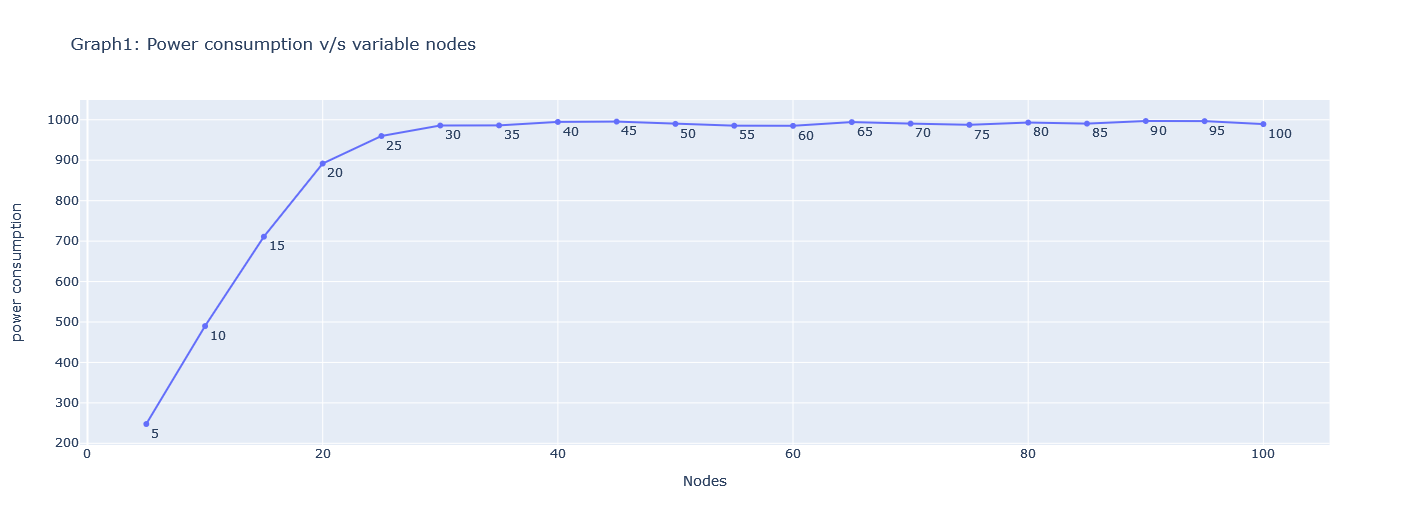

In [ ]:
print(list(df.values))

[250.81, 486.05, 748.31, 990.57, 1226.7676767676767, 1464.032258064516, 1684.0140845070423, 1857.796875, 1949.1066666666666, 1954.821052631579, 1979.939393939394, 1973.3838383838383, 1961.61, 1988.48, 1971.75, 1973.13, 1962.77, 2022.16, 2006.21, 1963.8]


In [ ]:
#{5: 242.03, 10: 492.0, 15: 745.88, 20: 998.63, 25: 1246.53, 30: 1487.66, 35: 1727.95, 40: 1976.2, 45: 2210.23, 50: 2483.83, 55: 2699.78, 60: 2996.5353535353534, 65: 3232.8804347826085, 70: 3409.139534883721, 75: 3572.3698630136987, 80: 3802.1388888888887, 85: 3841.4050632911394}
'''df = pd.Series(Datalist)
df.to_frame()
df.columns = ['Nodes', 'Power consumption']
df.to_csv('/tmp/nodes.csv')
print(df)'''
#fig = px.histogram(data_frame=df,x=df.index, y=df.values ,marginal='box',nbins=10,title='power consumption')
fig = px.line(data_frame=df, x=df.index, y=df.values ,color_discrete_sequence=['red'],)
fig.update_layout(title="Graph1 : Total power Consumption v/s variable nodes",
                          xaxis_title="Number of nodes",
                          yaxis_title="Total power consumption",
                      showlegend=True)
fig.show()

5      242.030000
10     492.000000
15     745.880000
20     998.630000
25    1246.530000
30    1487.660000
35    1727.950000
40    1976.200000
45    2210.230000
50    2483.830000
55    2699.780000
60    2996.535354
65    3232.880435
70    3409.139535
75    3572.369863
80    3802.138889
85    3841.405063
90    3928.829545
95    3943.242105
dtype: float64


In [ ]:
y = [242.030000,492.000000,745.880000,998.630000,1246.530000,1487.660000,1727.950000
,1976.200000,2210.230000,2483.830000
,2699.780000,2996.535354,3232.880435
,3409.139535,3572.369863,3802.138889
,3841.405063,3928.829545,3943.242105]

In [ ]:
import plotly.graph_objects as go
from plotly.graph_objs.layout import Title


x = [x for x in range(5,101,5)]
y = [242.030000,492.000000,745.880000,998.630000,1246.530000,1487.660000,1727.950000
,1976.200000,2210.230000,2483.830000
,2699.780000,2996.535354,3232.880435
,3409.139535,3572.369863,3802.138889
,3841.405063,3928.829545,3943.242105]
fig = go.Figure()
fig.add_trace(
    go.Scatter(x=x, y=y, name="Gateways=80", line=dict(color="blue"), mode="lines+markers")
    
)
'''fig.add_trace(
    go.Scatter(x=x, y=z, name="Gateways=40", mode='lines+markers')
)
fig.add_trace(
    go.Scatter(x=x, y=m, name="Gateways=60", mode="lines+markers")
)
fig.add_trace(
    go.Scatter(x=x, y=n, name="Gateways=80", mode="lines+markers")
)'''
fig.update_layout(
    title = "Total Power Consumption v/s Variable Nodes with Constant Gateways",
    xaxis_title = "Variable Nodes",
    yaxis_title = "Total Power Consumption",
    #xaxis = dict(range=[0,100]),
    #yaxis = dict(range=[300,3000])

)
fig.update_traces(textposition = "bottom right")

In [ ]:
import numpy as np
from numpy.lib.function_base import average
import pandas as pd
import matplotlib.pyplot as plt
import math
import plotly.express as px


Datalist = {}

class Node: ## class for creating node objects
    def __init__(self,battery=100,data=100):
        self.battery=battery
        self.data=data
    def set_values(self,battery=100,data=100):
        self.battery=battery
        self.data=data
    def get_values(self):
        return self.battery, self.data

class Gateway:  ## class for creating gateway objects
    def __init__(self,power=100,storage=100):
        self.power=power
        self.storage = storage
    def set_values(self,power,storage):
        self.storage=storage
        self.power=power
    def get_values(self):
        return self.power,self.storage

class Graph:	## class for creating graph objects
    def __init__(self,num_of_nodes,num_of_gateways):
        self.rows=num_of_nodes
        self.cols=num_of_gateways
        self.adjmatrix=[]
        for i in range(self.rows):
            self.adjmatrix.append([0 for j in range(self.cols)])
    def set_values(self,row,col,value):
        self.adjmatrix[row][col]=value
    def print_graph(self):
        for i in range(self.rows):
            for j in range(self.cols):
                print(self.adjmatrix[i][j],end=" ")
            print('\n')
        print('\n')

def create_nodes(n): ## function to create nodes
    '''while True:
        try:
            #n = int(input("Enter number of nodes: "))
            n=20
        except ValueError:
                print("Invalid input, try again")
                continue
        if n<=0:
            print("Number of nodes cannot be negative & zero ")
            continue
        else:
            break'''
    nodes = [Node() for i in range(n)]
    for i in range(n):
        #battery = int(input("Enter the battery in node{}: ".format(i)))
        ##data = int(input("Enter the data in node{}: ".format(i+1)))
        data  = np.random.randint(0,100)
        nodes[i].set_values(data,data)
    return nodes

def create_gateways(g): ## function to create gateways
    '''while True:
        try:
            g = int(input("Enter number of gateways: "))
            #g=20
        except ValueError:
            print("Invalid input, try again")
            continue
        if(g<=0):
            print("Number of gateways cannot be negative & zero ")
            continue
        else:
            break'''
    gateways = [Gateway() for i in range(g)]
    for i in range(g):
        while True:
            try:
                ##power = int(input("Enter the power in gateway{}: ".format(i+1)))
                power = np.random.randint(0,100)
            except ValueError:
                print("Invalid input, try again")
                continue
            if(power<0):
                print("Power cannot be negative ")
                continue
            else:
                break
        while True:
            try:
                ##storage = int(input("Enter the storage in gateway{}: ".format(i+1)))
                storage = np.random.randint(0,100)
            except ValueError:
                print("Invalid input, try again")
                continue
            if(storage<0):
                print("Storage cannot be negative ")
                continue
            else:
                break
        gateways[i].set_values(power,storage)
    return gateways

def create_graph(num_of_nodes,num_of_gateways):
    graph = Graph(num_of_nodes,num_of_gateways)
    for i in range(num_of_nodes):
        for j in range(num_of_gateways):
            while True:
                try:
                    ##graph.set_values(i,j,int(input("Enter if there is an edge b/w node {} to gateway {}: ".format(i+1,j+1))))
                    graph.set_values(i,j,np.random.randint(0,2))
                except ValueError:
                    print("Invalid input, try again")
                    continue
                if(graph.adjmatrix[i][j]<0):
                    print("Value cannot be negative ")
                    continue
                elif(graph.adjmatrix[i][j]>1):
                    print("Value cannot be greater than 1 ")
                    continue
                else:
                    break
    return graph

def gateways_connected_to_nodes(nodes,gateways,matrix):
    gateways_connected_to_nodes_list={}
    for i in range(len(nodes)):
        for j in range(len(gateways)):
            if(matrix.adjmatrix[i][j]==1):
                if(i in gateways_connected_to_nodes_list):
                    gateways_connected_to_nodes_list[i].append(j)
                else:
                    gateways_connected_to_nodes_list[i]=[j]
    return gateways_connected_to_nodes_list

def calculate_the_cost(each_node,each_gateway,nodes,gateways,matrix):
    cost=0
    ratio=float('inf')
    if(each_node.data>0):
        ratio = each_gateway.power/each_node.data
    return ratio

def TotalData(nodes): ## function to calculate the total data
    total_data=0
    for i in range(len(nodes)):
        total_data+=nodes[i].data
    return total_data

def TotalStorage(gateways): ## function to calculate the total power
    total_storage=0
    for i in range(len(gateways)):
        total_storage+=gateways[i].storage
    return total_storage



def optimization(nodes,gateways,matrix):
    #print("Optimization started")
    ratio={}
    mini_ratio = float('inf')
    final_gateways=[]
    intial_power = TotalStorage(gateways)
    gateways_connected_to_nodes_list=gateways_connected_to_nodes(nodes,gateways,matrix)
    while TotalData(nodes)>0 and TotalStorage(gateways)>0:
        for i in range(len(nodes)):
            for j in range(len(gateways)):
                if(matrix.adjmatrix[i][j]==1):
                    if(gateways[j].storage>0 and nodes[i].data>0):
                        ratio[(i,j)]=calculate_the_cost(nodes[i],gateways[j],nodes,gateways,matrix)
        for i in range(len(nodes)):
            for j in range(len(gateways)):
                if(matrix.adjmatrix[i][j]==1):
                    if(nodes[i].data>0 and gateways[j].storage>0):
                        if(ratio[(i,j)]<mini_ratio):
                            mini_ratio=ratio[(i,j)]
                            mini_node=i
                            mini_gateway=j
        if(mini_ratio==float('inf')):
            #print("Optimization complete")
            return
        else:
            ##print("Optimization in progress")
            final_gateways.append(mini_gateway)
            #print("Node {} is connected to gateway {} with ratio {}".format(mini_node,mini_gateway,mini_ratio))
            data_to_be_sent=min(nodes[mini_node].data, gateways[mini_gateway].storage)
            nodes[mini_node].data-=data_to_be_sent
            gateways[mini_gateway].storage-=data_to_be_sent
            '''if(nodes[mini_node].data==0):
                for j in range(len(gateways)):
                    matrix.adjmatrix[mini_node][j]=0
            if(gateways[mini_gateway].storage==0):
                for i in range(len(nodes)):
                    matrix.adjmatrix[i][mini_gateway]=0'''
            matrix.adjmatrix[mini_node][mini_gateway]=0
            mini_ratio=float('inf')
            ratio={}
    ## print("Optimization complete")

    final_power = TotalStorage(gateways)
    power_consumed = intial_power - final_power
    return power_consumed
    


    


if __name__ == '__main__':
 
  for i in range(5,101,5):
    datalist={}
    for j in range(100):
      nodes = create_nodes(80)
      gateways = create_gateways(i)
      graph = create_graph(len(nodes),len(gateways))
      datalist[j]=optimization(nodes,gateways,graph)
    df = pd.Series(datalist)
    Datalist[i] = df.mean()
    print(Datalist)
  df = pd.Series(Datalist)
  #df.to_csv('/tmp/gateways.csv')
  print(list(df.values))
    
            
    
    
    


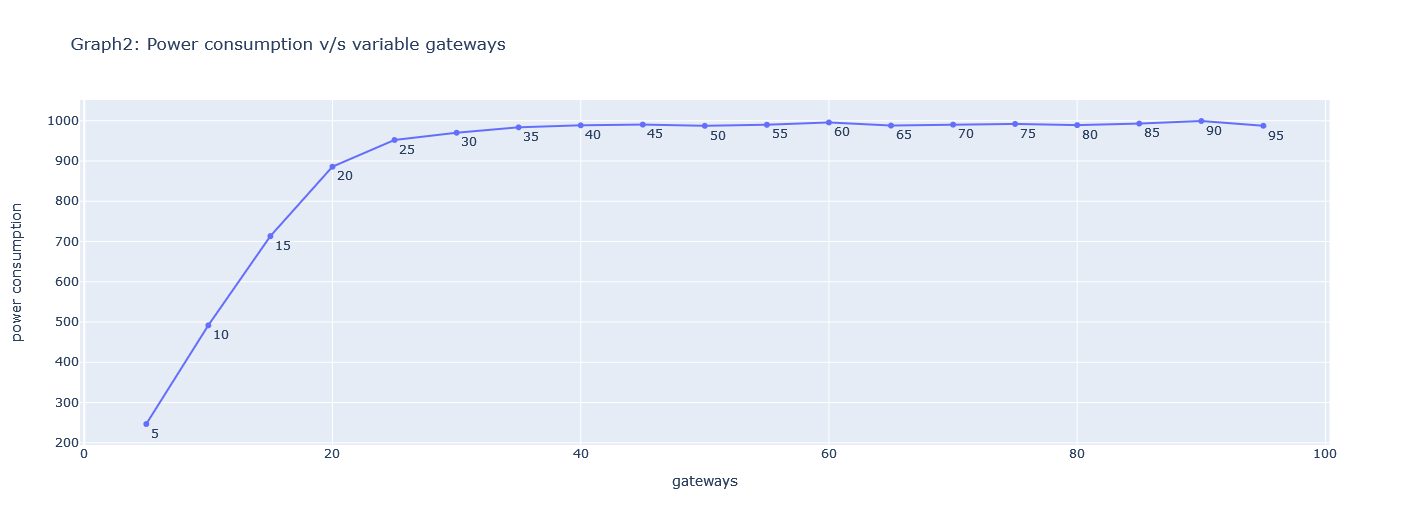

In [ ]:
import numpy as np
from numpy.lib.function_base import average
import pandas as pd
import matplotlib.pyplot as plt
import math
import plotly.express as px


Datalist = {}

class Node: ## class for creating node objects
    def __init__(self,battery=100,data=100):
        self.battery=battery
        self.data=data
    def set_values(self,battery=100,data=100):
        self.battery=battery
        self.data=data
    def get_values(self):
        return self.battery, self.data

class Gateway:  ## class for creating gateway objects
    def __init__(self,power=100,storage=100):
        self.power=power
        self.storage = storage
    def set_values(self,power,storage):
        self.storage=storage
        self.power=power
    def get_values(self):
        return self.power,self.storage

class Graph:	## class for creating graph objects
    def __init__(self,num_of_nodes,num_of_gateways):
        self.rows=num_of_nodes
        self.cols=num_of_gateways
        self.adjmatrix=[]
        for i in range(self.rows):
            self.adjmatrix.append([0 for j in range(self.cols)])
    def set_values(self,row,col,value):
        self.adjmatrix[row][col]=value
    def print_graph(self):
        for i in range(self.rows):
            for j in range(self.cols):
                print(self.adjmatrix[i][j],end=" ")
            print('\n')
        print('\n')

def create_nodes(n): ## function to create nodes
    '''while True:
        try:
            #n = int(input("Enter number of nodes: "))
            
        except ValueError:
                print("Invalid input, try again")
                continue
        if n<=0:
            print("Number of nodes cannot be negative & zero ")
            continue
        else:
            break'''
    nodes = [Node() for i in range(n)]
    for i in range(n):
        #battery = int(input("Enter the battery in node{}: ".format(i)))
        ##data = int(input("Enter the data in node{}: ".format(i+1)))
        #data  = np.random.randint(0,100)
        data=80
        nodes[i].set_values(data,data)
    return nodes

def create_gateways(): ## function to create gateways
    while True:
        try:
            #g = int(input("Enter number of gateways: "))
            g=20
        except ValueError:
            print("Invalid input, try again")
            continue
        if(g<=0):
            print("Number of gateways cannot be negative & zero ")
            continue
        else:
            break
    gateways = [Gateway() for i in range(g)]
    for i in range(g):
        while True:
            try:
                ##power = int(input("Enter the power in gateway{}: ".format(i+1)))
                power = np.random.randint(0,100)
            except ValueError:
                print("Invalid input, try again")
                continue
            if(power<0):
                print("Power cannot be negative ")
                continue
            else:
                break
        while True:
            try:
                ##storage = int(input("Enter the storage in gateway{}: ".format(i+1)))
                storage = np.random.randint(0,100)
            except ValueError:
                print("Invalid input, try again")
                continue
            if(storage<0):
                print("Storage cannot be negative ")
                continue
            else:
                break
        gateways[i].set_values(power,storage)
    return gateways

def create_graph(num_of_nodes,num_of_gateways):
    graph = Graph(num_of_nodes,num_of_gateways)
    for i in range(num_of_nodes):
        for j in range(num_of_gateways):
            while True:
                try:
                    ##graph.set_values(i,j,int(input("Enter if there is an edge b/w node {} to gateway {}: ".format(i+1,j+1))))
                    graph.set_values(i,j,np.random.randint(0,2))
                except ValueError:
                    print("Invalid input, try again")
                    continue
                if(graph.adjmatrix[i][j]<0):
                    print("Value cannot be negative ")
                    continue
                elif(graph.adjmatrix[i][j]>1):
                    print("Value cannot be greater than 1 ")
                    continue
                else:
                    break
    return graph

def gateways_connected_to_nodes(nodes,gateways,matrix):
    gateways_connected_to_nodes_list={}
    for i in range(len(nodes)):
        for j in range(len(gateways)):
            if(matrix.adjmatrix[i][j]==1):
                if(i in gateways_connected_to_nodes_list):
                    gateways_connected_to_nodes_list[i].append(j)
                else:
                    gateways_connected_to_nodes_list[i]=[j]
    return gateways_connected_to_nodes_list

def calculate_the_cost(each_node,each_gateway,nodes,gateways,matrix):
    cost=0
    ratio=float('inf')
    if(each_node.data>0):
        ratio = each_gateway.power/each_node.data
    return ratio

def TotalData(nodes): ## function to calculate the total data
    total_data=0
    for i in range(len(nodes)):
        total_data+=nodes[i].data
    return total_data

def TotalStorage(gateways): ## function to calculate the total power
    total_storage=0
    for i in range(len(gateways)):
        total_storage+=gateways[i].storage
    return total_storage



def optimization(nodes,gateways,matrix):
    #print("Optimization started")
    ratio={}
    mini_ratio = float('inf')
    final_gateways=[]
    intial_power = TotalStorage(gateways)
    gateways_connected_to_nodes_list=gateways_connected_to_nodes(nodes,gateways,matrix)
    while TotalData(nodes)>0 and TotalStorage(gateways)>0:
        for i in range(len(nodes)):
            for j in range(len(gateways)):
                if(matrix.adjmatrix[i][j]==1):
                    if(gateways[j].storage>0 and nodes[i].data>0):
                        ratio[(i,j)]=calculate_the_cost(nodes[i],gateways[j],nodes,gateways,matrix)
        for i in range(len(nodes)):
            for j in range(len(gateways)):
                if(matrix.adjmatrix[i][j]==1):
                    if(nodes[i].data>0 and gateways[j].storage>0):
                        if(ratio[(i,j)]<mini_ratio):
                            mini_ratio=ratio[(i,j)]
                            mini_node=i
                            mini_gateway=j
        if(mini_ratio==float('inf')):
            #print("Optimization complete")
            return
        else:
            ##print("Optimization in progress")
            final_gateways.append(mini_gateway)
            #print("Node {} is connected to gateway {} with ratio {}".format(mini_node,mini_gateway,mini_ratio))
            data_to_be_sent=min(nodes[mini_node].data, gateways[mini_gateway].storage)
            nodes[mini_node].data-=data_to_be_sent
            gateways[mini_gateway].storage-=data_to_be_sent
            '''if(nodes[mini_node].data==0):
                for j in range(len(gateways)):
                    matrix.adjmatrix[mini_node][j]=0
            if(gateways[mini_gateway].storage==0):
                for i in range(len(nodes)):
                    matrix.adjmatrix[i][mini_gateway]=0'''
            matrix.adjmatrix[mini_node][mini_gateway]=0
            mini_ratio=float('inf')
            ratio={}
    ## print("Optimization complete")

    final_power = TotalStorage(gateways)
    power_consumed = intial_power - final_power
    return power_consumed
    


    


if __name__ == '__main__':
 
  for i in range(5,101,5):
    datalist={}
    for j in range(100):
      nodes = create_nodes(i)
      gateways = create_gateways()
      graph = create_graph(len(nodes),len(gateways))
      datalist[j]=optimization(nodes,gateways,graph)
    df = pd.Series(datalist)
    Datalist[i] = df.mean()
    print(Datalist)
  df = pd.Series(Datalist)
  #df.to_csv('/tmp/graph3.csv')
  print(list(df.values))
    
            
    
    
    


In [ ]:
df = pd.read_csv('/tmp/graph3.csv')
df.columns = ['nodes', 'power consumption']
df 
fig = px.line(data_frame=df, x='nodes', y='power consumption',title="Graph3: Power consumption v/s variable nodes and data is constant i,e 60", text='nodes')
fig.update_traces(textposition="bottom right")
fig.show()

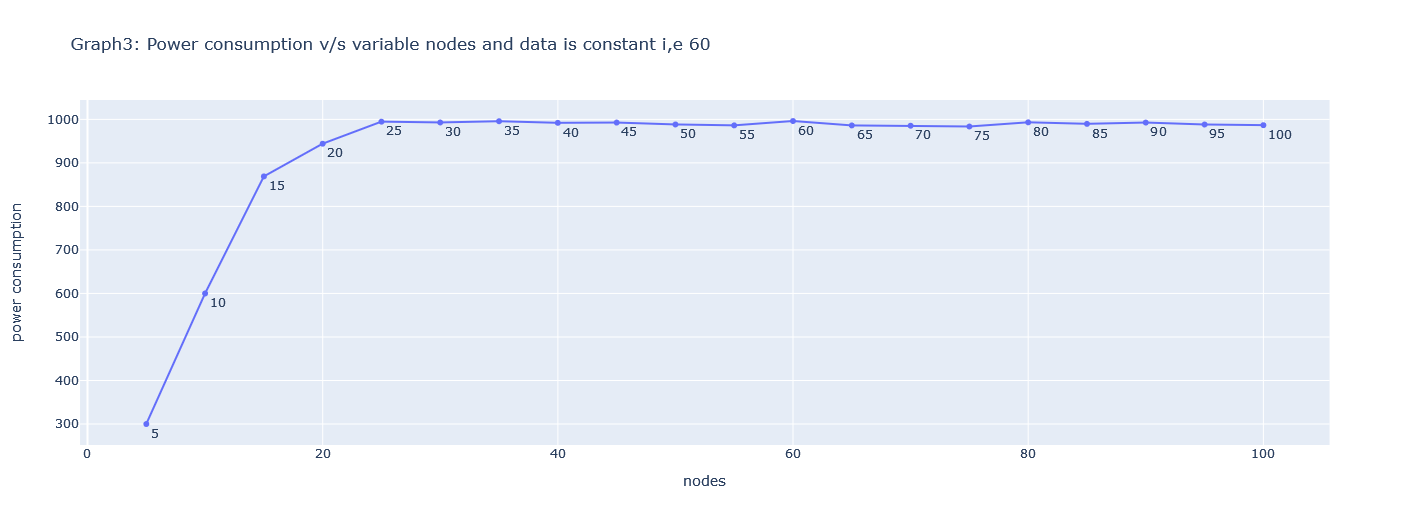

In [ ]:
import numpy as np
from numpy.lib.function_base import average
import pandas as pd
import matplotlib.pyplot as plt
import math
import plotly.express as px


Datalist = {}

class Node: ## class for creating node objects
    def __init__(self,battery=100,data=100):
        self.battery=battery
        self.data=data
    def set_values(self,battery=100,data=100):
        self.battery=battery
        self.data=data
    def get_values(self):
        return self.battery, self.data

class Gateway:  ## class for creating gateway objects
    def __init__(self,power=100,storage=100):
        self.power=power
        self.storage = storage
    def set_values(self,power,storage):
        self.storage=storage
        self.power=power
    def get_values(self):
        return self.power,self.storage

class Graph:	## class for creating graph objects
    def __init__(self,num_of_nodes,num_of_gateways):
        self.rows=num_of_nodes
        self.cols=num_of_gateways
        self.adjmatrix=[]
        for i in range(self.rows):
            self.adjmatrix.append([0 for j in range(self.cols)])
    def set_values(self,row,col,value):
        self.adjmatrix[row][col]=value
    def print_graph(self):
        for i in range(self.rows):
            for j in range(self.cols):
                print(self.adjmatrix[i][j],end=" ")
            print('\n')
        print('\n')

def create_nodes(n): ## function to create nodes
    '''while True:
        try:
            #n = int(input("Enter number of nodes: "))
            
        except ValueError:
                print("Invalid input, try again")
                continue
        if n<=0:
            print("Number of nodes cannot be negative & zero ")
            continue
        else:
            break'''
    nodes = [Node() for i in range(n)]
    for i in range(n):
        #battery = int(input("Enter the battery in node{}: ".format(i)))
        ##data = int(input("Enter the data in node{}: ".format(i+1)))
        data  = np.random.randint(0,100)
        #data=500
        nodes[i].set_values(data,data)
    return nodes

def create_gateways(g): ## function to create gateways
    '''while True:
        try:
            #g = int(input("Enter number of gateways: "))
            g=20
        except ValueError:
            print("Invalid input, try again")
            continue
        if(g<=0):
            print("Number of gateways cannot be negative & zero ")
            continue
        else:
            break'''
    gateways = [Gateway() for i in range(g)]
    for i in range(g):
        while True:
            try:
                ##power = int(input("Enter the power in gateway{}: ".format(i+1)))
                power = np.random.randint(0,100)
            except ValueError:
                print("Invalid input, try again")
                continue
            if(power<0):
                print("Power cannot be negative ")
                continue
            else:
                break
        while True:
            try:
                ##storage = int(input("Enter the storage in gateway{}: ".format(i+1)))
                storage = np.random.randint(0,100)
            except ValueError:
                print("Invalid input, try again")
                continue
            if(storage<0):
                print("Storage cannot be negative ")
                continue
            else:
                break
        gateways[i].set_values(power,storage)
    return gateways

def create_graph(num_of_nodes,num_of_gateways):
    graph = Graph(num_of_nodes,num_of_gateways)
    for i in range(num_of_nodes):
        for j in range(num_of_gateways):
            while True:
                try:
                    ##graph.set_values(i,j,int(input("Enter if there is an edge b/w node {} to gateway {}: ".format(i+1,j+1))))
                    graph.set_values(i,j,np.random.randint(0,2))
                except ValueError:
                    print("Invalid input, try again")
                    continue
                if(graph.adjmatrix[i][j]<0):
                    print("Value cannot be negative ")
                    continue
                elif(graph.adjmatrix[i][j]>1):
                    print("Value cannot be greater than 1 ")
                    continue
                else:
                    break
    return graph

def gateways_connected_to_nodes(nodes,gateways,matrix):
    gateways_connected_to_nodes_list={}
    for i in range(len(nodes)):
        for j in range(len(gateways)):
            if(matrix.adjmatrix[i][j]==1):
                if(i in gateways_connected_to_nodes_list):
                    gateways_connected_to_nodes_list[i].append(j)
                else:
                    gateways_connected_to_nodes_list[i]=[j]
    return gateways_connected_to_nodes_list

def calculate_the_cost(each_node,each_gateway,nodes,gateways,matrix):
    cost=0
    ratio=float('inf')
    if(each_node.data>0):
        ratio = each_gateway.power/each_node.data
    return ratio

def TotalData(nodes): ## function to calculate the total data
    total_data=0
    for i in range(len(nodes)):
        total_data+=nodes[i].data
    return total_data

def TotalStorage(gateways): ## function to calculate the total power
    total_storage=0
    for i in range(len(gateways)):
        total_storage+=gateways[i].storage
    return total_storage



def optimization(nodes,gateways,matrix):
    #print("Optimization started")
    ratio={}
    mini_ratio = float('inf')
    final_gateways=[]
    intial_data = TotalData(nodes)
    gateways_connected_to_nodes_list=gateways_connected_to_nodes(nodes,gateways,matrix)
    while TotalData(nodes)>0 and TotalStorage(gateways)>0:
        for i in range(len(nodes)):
            for j in range(len(gateways)):
                if(matrix.adjmatrix[i][j]==1):
                    if(gateways[j].storage>0 and nodes[i].data>0):
                        ratio[(i,j)]=calculate_the_cost(nodes[i],gateways[j],nodes,gateways,matrix)
        for i in range(len(nodes)):
            for j in range(len(gateways)):
                if(matrix.adjmatrix[i][j]==1):
                    if(nodes[i].data>0 and gateways[j].storage>0):
                        if(ratio[(i,j)]<mini_ratio):
                            mini_ratio=ratio[(i,j)]
                            mini_node=i
                            mini_gateway=j
        if(mini_ratio==float('inf')):
            #print("Optimization complete")
            return
        else:
            ##print("Optimization in progress")
            final_gateways.append(mini_gateway)
            #print("Node {} is connected to gateway {} with ratio {}".format(mini_node,mini_gateway,mini_ratio))
            data_to_be_sent=min(nodes[mini_node].data, gateways[mini_gateway].storage)
            nodes[mini_node].data-=data_to_be_sent
            gateways[mini_gateway].storage-=data_to_be_sent
            '''if(nodes[mini_node].data==0):
                for j in range(len(gateways)):
                    matrix.adjmatrix[mini_node][j]=0
            if(gateways[mini_gateway].storage==0):
                for i in range(len(nodes)):
                    matrix.adjmatrix[i][mini_gateway]=0'''
            matrix.adjmatrix[mini_node][mini_gateway]=0
            mini_ratio=float('inf')
            ratio={}
    ## print("Optimization complete")

    final_data = TotalData(nodes)
    data_consumed = intial_data - final_data
    return data_consumed
    


    


if __name__ == '__main__':
 
  for i in range(5,101,5):
    datalist={}
    for j in range(100):
      nodes = create_nodes(i)
      gateways = create_gateways(80)
      graph = create_graph(len(nodes),len(gateways))
      datalist[j]=optimization(nodes,gateways,graph)
    df = pd.Series(datalist)
    Datalist[i] = df.mean()
    print(Datalist)
  df = pd.Series(Datalist)
  df.to_csv('/tmp/graph4.csv')

{5: 245.94}
{5: 245.94, 10: 494.96}
{5: 245.94, 10: 494.96, 15: 741.57}
{5: 245.94, 10: 494.96, 15: 741.57, 20: 987.29}
{5: 245.94, 10: 494.96, 15: 741.57, 20: 987.29, 25: 1215.63}
{5: 245.94, 10: 494.96, 15: 741.57, 20: 987.29, 25: 1215.63, 30: 1476.76}
{5: 245.94, 10: 494.96, 15: 741.57, 20: 987.29, 25: 1215.63, 30: 1476.76, 35: 1746.53}
{5: 245.94, 10: 494.96, 15: 741.57, 20: 987.29, 25: 1215.63, 30: 1476.76, 35: 1746.53, 40: 2001.74}
{5: 245.94, 10: 494.96, 15: 741.57, 20: 987.29, 25: 1215.63, 30: 1476.76, 35: 1746.53, 40: 2001.74, 45: 2235.19}
{5: 245.94, 10: 494.96, 15: 741.57, 20: 987.29, 25: 1215.63, 30: 1476.76, 35: 1746.53, 40: 2001.74, 45: 2235.19, 50: 2473.94}
{5: 245.94, 10: 494.96, 15: 741.57, 20: 987.29, 25: 1215.63, 30: 1476.76, 35: 1746.53, 40: 2001.74, 45: 2235.19, 50: 2473.94, 55: 2722.72}
{5: 245.94, 10: 494.96, 15: 741.57, 20: 987.29, 25: 1215.63, 30: 1476.76, 35: 1746.53, 40: 2001.74, 45: 2235.19, 50: 2473.94, 55: 2722.72, 60: 2915.59}
{5: 245.94, 10: 494.96, 15: 

In [ ]:
df = pd.read_csv('/tmp/graph4.csv')
df.columns=['nodes','total data sent']
fig = px.line(data_frame=df, x='nodes', y='total data sent',title="Graph4: Total data sent v/s variable nodes and constant gateways ", text='nodes')
fig.update_traces(textposition="bottom right")
fig.show()

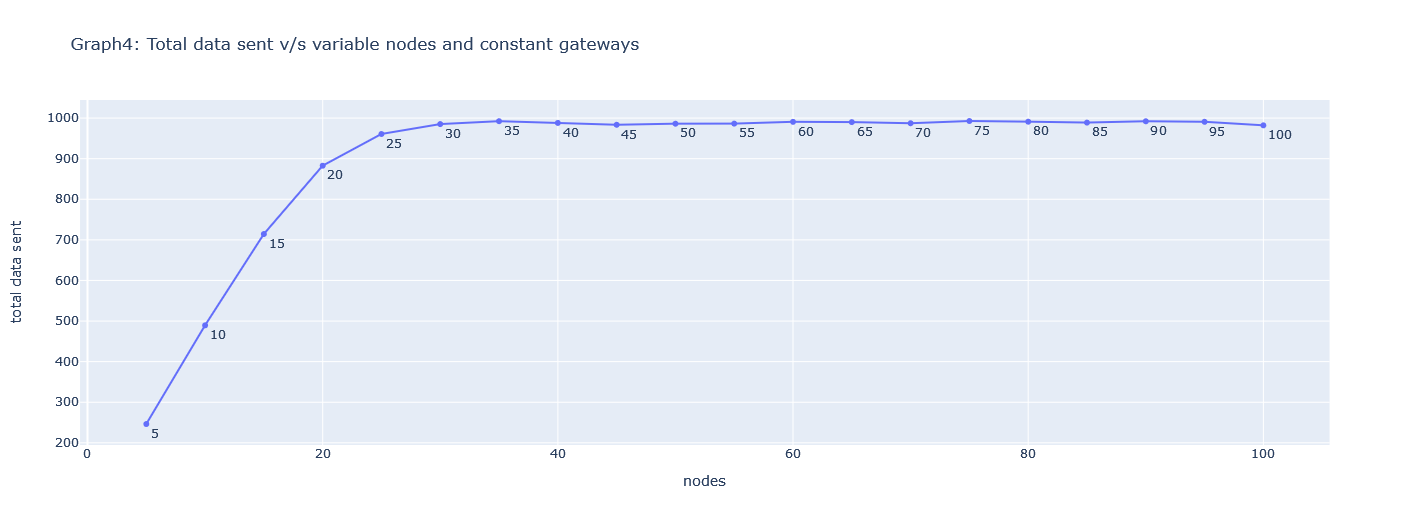

In [ ]:
import numpy as np
from numpy.lib.function_base import average
import pandas as pd
import matplotlib.pyplot as plt
import math
import plotly.express as px


Datalist = {}

class Node: ## class for creating node objects
    def __init__(self,battery=100,data=100):
        self.battery=battery
        self.data=data
    def set_values(self,battery=100,data=100):
        self.battery=battery
        self.data=data
    def get_values(self):
        return self.battery, self.data

class Gateway:  ## class for creating gateway objects
    def __init__(self,power=100,storage=100):
        self.power=power
        self.storage = storage
    def set_values(self,power,storage):
        self.storage=storage
        self.power=power
    def get_values(self):
        return self.power,self.storage

class Graph:	## class for creating graph objects
    def __init__(self,num_of_nodes,num_of_gateways):
        self.rows=num_of_nodes
        self.cols=num_of_gateways
        self.adjmatrix=[]
        for i in range(self.rows):
            self.adjmatrix.append([0 for j in range(self.cols)])
    def set_values(self,row,col,value):
        self.adjmatrix[row][col]=value
    def print_graph(self):
        for i in range(self.rows):
            for j in range(self.cols):
                print(self.adjmatrix[i][j],end=" ")
            print('\n')
        print('\n')

def create_nodes(n): ## function to create nodes
    '''while True:
        try:
            #n = int(input("Enter number of nodes: "))
            
        except ValueError:
                print("Invalid input, try again")
                continue
        if n<=0:
            print("Number of nodes cannot be negative & zero ")
            continue
        else:
            break'''
    nodes = [Node() for i in range(n)]
    for i in range(n):
        #battery = int(input("Enter the battery in node{}: ".format(i)))
        ##data = int(input("Enter the data in node{}: ".format(i+1)))
        #data  = np.random.randint(0,100)
        data=np.random.randint(0,100)
        nodes[i].set_values(data,data)
    return nodes

def create_gateways(g): ## function to create gateways
    '''while True:
        try:
            #g = int(input("Enter number of gateways: "))
            g=20
        except ValueError:
            print("Invalid input, try again")
            continue
        if(g<=0):
            print("Number of gateways cannot be negative & zero ")
            continue
        else:
            break'''
    gateways = [Gateway() for i in range(g)]
    for i in range(g):
        while True:
            try:
                ##power = int(input("Enter the power in gateway{}: ".format(i+1)))
                power = np.random.randint(0,100)
            except ValueError:
                print("Invalid input, try again")
                continue
            if(power<0):
                print("Power cannot be negative ")
                continue
            else:
                break
        while True:
            try:
                ##storage = int(input("Enter the storage in gateway{}: ".format(i+1)))
                storage = np.random.randint(0,100)
            except ValueError:
                print("Invalid input, try again")
                continue
            if(storage<0):
                print("Storage cannot be negative ")
                continue
            else:
                break
        gateways[i].set_values(power,storage)
    return gateways

def create_graph(num_of_nodes,num_of_gateways):
    graph = Graph(num_of_nodes,num_of_gateways)
    for i in range(num_of_nodes):
        for j in range(num_of_gateways):
            while True:
                try:
                    ##graph.set_values(i,j,int(input("Enter if there is an edge b/w node {} to gateway {}: ".format(i+1,j+1))))
                    graph.set_values(i,j,np.random.randint(0,2))
                except ValueError:
                    print("Invalid input, try again")
                    continue
                if(graph.adjmatrix[i][j]<0):
                    print("Value cannot be negative ")
                    continue
                elif(graph.adjmatrix[i][j]>1):
                    print("Value cannot be greater than 1 ")
                    continue
                else:
                    break
    return graph

def gateways_connected_to_nodes(nodes,gateways,matrix):
    gateways_connected_to_nodes_list={}
    for i in range(len(nodes)):
        for j in range(len(gateways)):
            if(matrix.adjmatrix[i][j]==1):
                if(i in gateways_connected_to_nodes_list):
                    gateways_connected_to_nodes_list[i].append(j)
                else:
                    gateways_connected_to_nodes_list[i]=[j]
    return gateways_connected_to_nodes_list

def calculate_the_cost(each_node,each_gateway,nodes,gateways,matrix):
    cost=0
    ratio=float('inf')
    if(each_node.data>0):
        ratio = each_gateway.power/each_node.data
    return ratio

def TotalData(nodes): ## function to calculate the total data
    total_data=0
    for i in range(len(nodes)):
        total_data+=nodes[i].data
    return total_data

def TotalStorage(gateways): ## function to calculate the total power
    total_storage=0
    for i in range(len(gateways)):
        total_storage+=gateways[i].storage
    return total_storage



def optimization(nodes,gateways,matrix):
    count=0
    #print("Optimization started")
    ratio={}
    mini_ratio = float('inf')
    final_gateways=[]
    intial_data = TotalData(nodes)
    gateways_connected_to_nodes_list=gateways_connected_to_nodes(nodes,gateways,matrix)
    while TotalData(nodes)>0 and TotalStorage(gateways)>0:
        for i in range(len(nodes)):
            for j in range(len(gateways)):
                if(matrix.adjmatrix[i][j]==1):
                    if(gateways[j].storage>0 and nodes[i].data>0):
                        ratio[(i,j)]=calculate_the_cost(nodes[i],gateways[j],nodes,gateways,matrix)
        for i in range(len(nodes)):
            for j in range(len(gateways)):
                if(matrix.adjmatrix[i][j]==1):
                    if(nodes[i].data>0 and gateways[j].storage>0):
                        if(ratio[(i,j)]<mini_ratio):
                            mini_ratio=ratio[(i,j)]
                            mini_node=i
                            mini_gateway=j
        if(mini_ratio==float('inf')):
            #print("Optimization complete")
            return
        else:
            ##print("Optimization in progress")
            final_gateways.append(mini_gateway)
            #print("Node {} is connected to gateway {} with ratio {}".format(mini_node,mini_gateway,mini_ratio))
            data_to_be_sent=min(nodes[mini_node].data, gateways[mini_gateway].storage)
            nodes[mini_node].data-=data_to_be_sent
            gateways[mini_gateway].storage-=data_to_be_sent
            '''if(nodes[mini_node].data==0):
                for j in range(len(gateways)):
                    matrix.adjmatrix[mini_node][j]=0
            if(gateways[mini_gateway].storage==0):
                for i in range(len(nodes)):
                    matrix.adjmatrix[i][mini_gateway]=0'''
            matrix.adjmatrix[mini_node][mini_gateway]=0
            mini_ratio=float('inf')
            ratio={}
    ## print("Optimization complete")
    for node in nodes:
      if node.data<=0:
        count+=1
    '''final_data = TotalData(nodes)
    data_consumed = intial_data - final_data
    return data_consumed'''
    return count
    


    


if __name__ == '__main__':
  
  for i in range(5,101,5):
    datalist={}
    for j in range(100):
      nodes = create_nodes(i)
      gateways = create_gateways(80)
      graph = create_graph(len(nodes),len(gateways))
      datalist[j]=optimization(nodes,gateways,graph)
      #print(datalist[j])
    df = pd.Series(datalist)
    Datalist[i] = df.mean()
    print(Datalist)
  df = pd.Series(Datalist)
  #df.to_csv('/tmp/graph5.csv')
  print(list(df.values))

{5: 5.0}
{5: 5.0, 10: 10.0}
{5: 5.0, 10: 10.0, 15: 15.0}
{5: 5.0, 10: 10.0, 15: 15.0, 20: 20.0}
{5: 5.0, 10: 10.0, 15: 15.0, 20: 20.0, 25: 25.0}
{5: 5.0, 10: 10.0, 15: 15.0, 20: 20.0, 25: 25.0, 30: 30.0}
{5: 5.0, 10: 10.0, 15: 15.0, 20: 20.0, 25: 25.0, 30: 30.0, 35: 35.0}
{5: 5.0, 10: 10.0, 15: 15.0, 20: 20.0, 25: 25.0, 30: 30.0, 35: 35.0, 40: 40.0}
{5: 5.0, 10: 10.0, 15: 15.0, 20: 20.0, 25: 25.0, 30: 30.0, 35: 35.0, 40: 40.0, 45: 45.0}
{5: 5.0, 10: 10.0, 15: 15.0, 20: 20.0, 25: 25.0, 30: 30.0, 35: 35.0, 40: 40.0, 45: 45.0, 50: 50.0}
{5: 5.0, 10: 10.0, 15: 15.0, 20: 20.0, 25: 25.0, 30: 30.0, 35: 35.0, 40: 40.0, 45: 45.0, 50: 50.0, 55: 55.0}
{5: 5.0, 10: 10.0, 15: 15.0, 20: 20.0, 25: 25.0, 30: 30.0, 35: 35.0, 40: 40.0, 45: 45.0, 50: 50.0, 55: 55.0, 60: 60.0}
{5: 5.0, 10: 10.0, 15: 15.0, 20: 20.0, 25: 25.0, 30: 30.0, 35: 35.0, 40: 40.0, 45: 45.0, 50: 50.0, 55: 55.0, 60: 60.0, 65: 64.85714285714286}
{5: 5.0, 10: 10.0, 15: 15.0, 20: 20.0, 25: 25.0, 30: 30.0, 35: 35.0, 40: 40.0, 45: 45.0, 5

In [ ]:
df = pd.read_csv('/tmp/graph5.csv')
df.columns=['nodes','Data sent fully']
fig = px.line(data_frame=df, x='nodes', y='Data sent fully',title="Graph5: Data sent fully v/s variable nodes and constant gateways ", text='nodes')
fig.update_traces(textposition="bottom right")
fig.show()

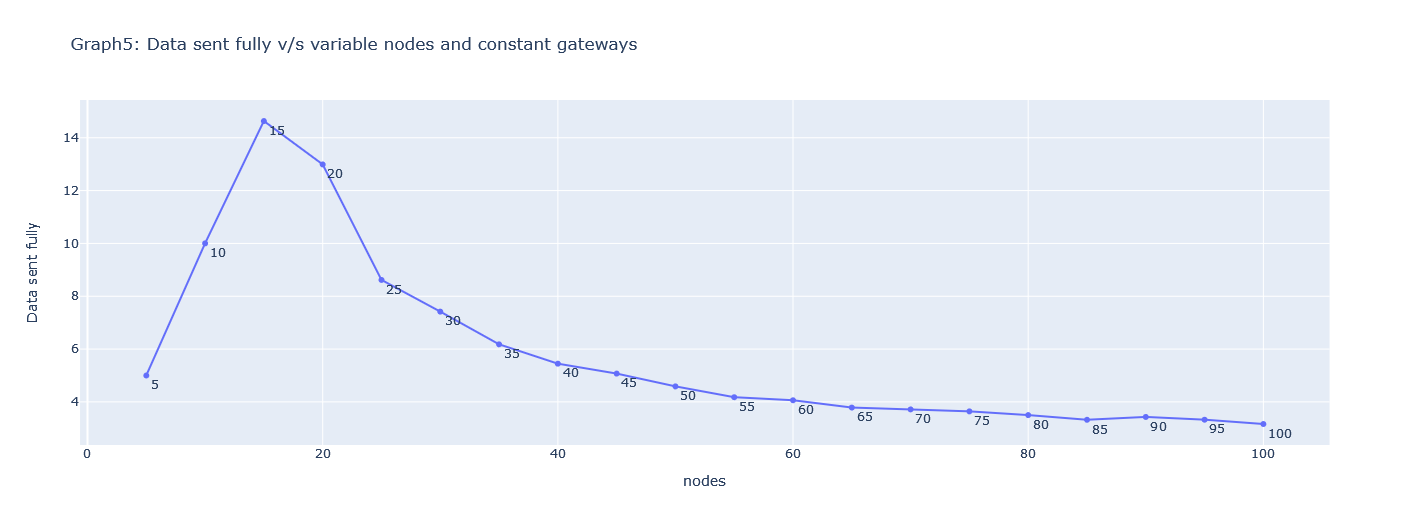

In [ ]:
import numpy as np
from numpy.lib.function_base import average
import pandas as pd
import matplotlib.pyplot as plt
import math
import plotly.express as px


Datalist = {}

class Node: ## class for creating node objects
    def __init__(self,battery=100,data=100):
        self.battery=battery
        self.data=data
    def set_values(self,battery=100,data=100):
        self.battery=battery
        self.data=data
    def get_values(self):
        return self.battery, self.data

class Gateway:  ## class for creating gateway objects
    def __init__(self,power=100,storage=100):
        self.power=power
        self.storage = storage
    def set_values(self,power,storage):
        self.storage=storage
        self.power=power
    def get_values(self):
        return self.power,self.storage

class Graph:	## class for creating graph objects
    def __init__(self,num_of_nodes,num_of_gateways):
        self.rows=num_of_nodes
        self.cols=num_of_gateways
        self.adjmatrix=[]
        for i in range(self.rows):
            self.adjmatrix.append([0 for j in range(self.cols)])
    def set_values(self,row,col,value):
        self.adjmatrix[row][col]=value
    def print_graph(self):
        for i in range(self.rows):
            for j in range(self.cols):
                print(self.adjmatrix[i][j],end=" ")
            print('\n')
        print('\n')

def create_nodes(n): ## function to create nodes
    '''while True:
        try:
            #n = int(input("Enter number of nodes: "))
            
        except ValueError:
                print("Invalid input, try again")
                continue
        if n<=0:
            print("Number of nodes cannot be negative & zero ")
            continue
        else:
            break'''
    nodes = [Node() for i in range(n)]
    for i in range(n):
        #battery = int(input("Enter the battery in node{}: ".format(i)))
        ##data = int(input("Enter the data in node{}: ".format(i+1)))
        #data  = np.random.randint(0,100)
        data=np.random.randint(1,100)
        nodes[i].set_values(data,data)
    return nodes

def create_gateways(g): ## function to create gateways
    '''while True:
        try:
            #g = int(input("Enter number of gateways: "))
            g=20
        except ValueError:
            print("Invalid input, try again")
            continue
        if(g<=0):
            print("Number of gateways cannot be negative & zero ")
            continue
        else:
            break'''
    gateways = [Gateway() for i in range(g)]
    for i in range(g):
        while True:
            try:
                ##power = int(input("Enter the power in gateway{}: ".format(i+1)))
                power = np.random.randint(0,100)
            except ValueError:
                print("Invalid input, try again")
                continue
            if(power<0):
                print("Power cannot be negative ")
                continue
            else:
                break
        while True:
            try:
                ##storage = int(input("Enter the storage in gateway{}: ".format(i+1)))
                storage = np.random.randint(0,100)
            except ValueError:
                print("Invalid input, try again")
                continue
            if(storage<0):
                print("Storage cannot be negative ")
                continue
            else:
                break
        gateways[i].set_values(power,storage)
    return gateways

def create_graph(num_of_nodes,num_of_gateways):
    graph = Graph(num_of_nodes,num_of_gateways)
    for i in range(num_of_nodes):
        for j in range(num_of_gateways):
            while True:
                try:
                    ##graph.set_values(i,j,int(input("Enter if there is an edge b/w node {} to gateway {}: ".format(i+1,j+1))))
                    graph.set_values(i,j,np.random.randint(0,2))
                except ValueError:
                    print("Invalid input, try again")
                    continue
                if(graph.adjmatrix[i][j]<0):
                    print("Value cannot be negative ")
                    continue
                elif(graph.adjmatrix[i][j]>1):
                    print("Value cannot be greater than 1 ")
                    continue
                else:
                    break
    return graph

def gateways_connected_to_nodes(nodes,gateways,matrix):
    gateways_connected_to_nodes_list={}
    for i in range(len(nodes)):
        for j in range(len(gateways)):
            if(matrix.adjmatrix[i][j]==1):
                if(i in gateways_connected_to_nodes_list):
                    gateways_connected_to_nodes_list[i].append(j)
                else:
                    gateways_connected_to_nodes_list[i]=[j]
    return gateways_connected_to_nodes_list

def calculate_the_cost(each_node,each_gateway,nodes,gateways,matrix):
    cost=0
    ratio=float('inf')
    if(each_node.data>0):
        ratio = each_gateway.power/each_node.data
    return ratio

def TotalData(nodes): ## function to calculate the total data
    total_data=0
    for i in range(len(nodes)):
        total_data+=nodes[i].data
    return total_data

def TotalStorage(gateways): ## function to calculate the total power
    total_storage=0
    for i in range(len(gateways)):
        total_storage+=gateways[i].storage
    return total_storage



def optimization(nodes,gateways,matrix):
    #print("Optimization started")
    ratio={}
    mini_ratio = float('inf')
    final_gateways=[]
    intial_power = TotalStorage(gateways)
    gateways_connected_to_nodes_list=gateways_connected_to_nodes(nodes,gateways,matrix)
    while TotalData(nodes)>0 and TotalStorage(gateways)>0:
        for i in range(len(nodes)):
            for j in range(len(gateways)):
                if(matrix.adjmatrix[i][j]==1):
                    if(gateways[j].storage>0 and nodes[i].data>0):
                        ratio[(i,j)]=calculate_the_cost(nodes[i],gateways[j],nodes,gateways,matrix)
        for i in range(len(nodes)):
            for j in range(len(gateways)):
                if(matrix.adjmatrix[i][j]==1):
                    if(nodes[i].data>0 and gateways[j].storage>0):
                        if(ratio[(i,j)]<mini_ratio):
                            mini_ratio=ratio[(i,j)]
                            mini_node=i
                            mini_gateway=j
        if(mini_ratio==float('inf')):
            #print("Optimization complete")
            return
        else:
            ##print("Optimization in progress")
            final_gateways.append(mini_gateway)
            #print("Node {} is connected to gateway {} with ratio {}".format(mini_node,mini_gateway,mini_ratio))
            data_to_be_sent=min(nodes[mini_node].data, gateways[mini_gateway].storage)
            nodes[mini_node].data-=data_to_be_sent
            gateways[mini_gateway].storage-=data_to_be_sent
            '''if(nodes[mini_node].data==0):
                for j in range(len(gateways)):
                    matrix.adjmatrix[mini_node][j]=0
            if(gateways[mini_gateway].storage==0):
                for i in range(len(nodes)):
                    matrix.adjmatrix[i][mini_gateway]=0'''
            matrix.adjmatrix[mini_node][mini_gateway]=0
            mini_ratio=float('inf')
            ratio={}
    ## print("Optimization complete")

    final_power = TotalStorage(gateways)
    power_consumed = intial_power - final_power
    return power_consumed
    


    


if __name__ == '__main__':
 
  for i in range(5,101,5):
    datalist={}
    for j in range(100):
      nodes = create_nodes(300)
      gateways = create_gateways(i)
      graph = create_graph(len(nodes),len(gateways))
      datalist[j]=optimization(nodes,gateways,graph)
    df = pd.Series(datalist)
    Datalist[i] = df.mean()
    print(Datalist)
  df = pd.Series(Datalist)
  #df.to_csv('/tmp/graph6.csv')
  print(list(df.values))
    
            
    
    
    


In [ ]:
df = pd.read_csv('/tmp/graph6.csv')
df.columns=['gateways','power consumption']
fig = px.line(data_frame=df, x='gateways', y='power consumption',title="Graph6: power consumption v/s variable gateways and variables nodes ", text='gateways')
fig.update_traces(textposition="bottom right")
fig.show()

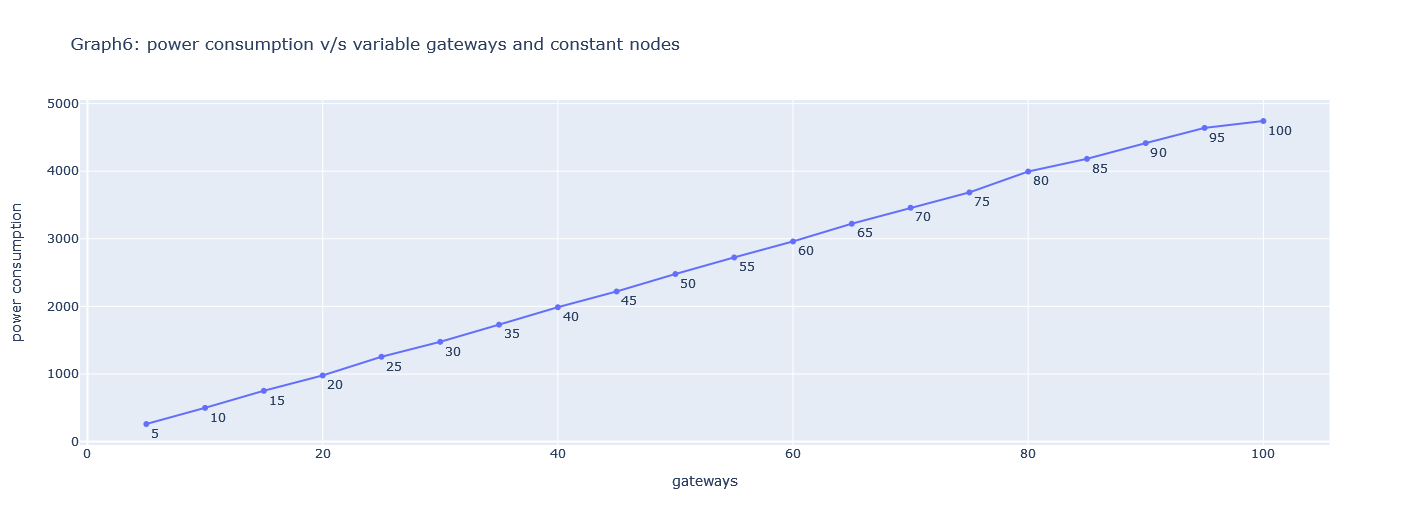